Nama  : Chandani Novitasari <br>
NIM   : 211351036 <br>
Kelas : Malam A

#Import dataset

In [84]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"chandaninovitasari","key":"18e942d9542e0b5b29f3da962326ed36"}'}

In [85]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [86]:
!kaggle datasets download -d uciml/german-credit

german-credit.zip: Skipping, found more recently modified local copy (use --force to force download)


In [87]:
!mkdir german-credit
!unzip german-credit.zip -d german-credit
!ls german-credit

mkdir: cannot create directory ‘german-credit’: File exists
Archive:  german-credit.zip
replace german-credit/german_credit_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: german_credit_data.csv


#Import library yang digunakan

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as py
import os
import plotly.io as pio
pio.renderers.default='notebook'

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as shc
import plotly.graph_objects as go

In [89]:
df =  pd.read_csv('german-credit/german_credit_data.csv', index_col=0)
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


#Data discovery

Deskripsi Data

Pada dataset ini didapatkan :

Terdapat 1000 row data dengan 9 kolom<br>
Masih ada data yang kosong yaitu pada kolom saving accounts dan checking accounts<br>
Terdapat 4 kolom dengan tipe integer dan 5 kolom dengan tipe data object

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [91]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [92]:
df.describe(include=['object'])

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


In [93]:
df.describe(include=['object'])

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


In [94]:
print('Nilai Unik Sex/Gender:', df['Sex'].unique())
print('')
print('Nilai Unik Housing/Status Tinggal:', df['Housing'].unique())
print('')
print('Nilai Unik Saving accounts/Uang Tabungan:', df['Saving accounts'].unique())
print('')
print('Nilai Unik Checking account/Tabungan Giro:', df['Checking account'].unique())
print('')
print('Nilai Unik Checking Purpose/Tujuan', df['Purpose'].unique())

Nilai Unik Sex/Gender: ['male' 'female']

Nilai Unik Housing/Status Tinggal: ['own' 'free' 'rent']

Nilai Unik Saving accounts/Uang Tabungan: [nan 'little' 'quite rich' 'rich' 'moderate']

Nilai Unik Checking account/Tabungan Giro: ['little' 'moderate' nan 'rich']

Nilai Unik Checking Purpose/Tujuan ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [95]:
numeric = ['Age', 'Job', 'Credit amount', 'Duration']
categorical = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

#Exploratory Data Analysis (EDA)

Cek kembali data yang kosong

Didapatkan pada kolom Saving account 183 data kosong dan pada kolom Checking amount 394 data kossong sedangakan pada kolom lainnya tidak terdapat data yang kosong.

In [96]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Melihat lagi data unik pada kolom saving accounts dan checking account karena terdapat data yang kosong pada ke-2 kolom tsb.

In [97]:
print('Data Uik saving accounts:', df['Saving accounts'].unique())
print('Data Unik checking account:', df['Checking account'].unique())

Data Uik saving accounts: [nan 'little' 'quite rich' 'rich' 'moderate']
Data Unik checking account: ['little' 'moderate' nan 'rich']


Mengisi data yang kosong tersebut dengan label 'unknown' atau tidak diketahui

In [98]:
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,unknown,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,unknown,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


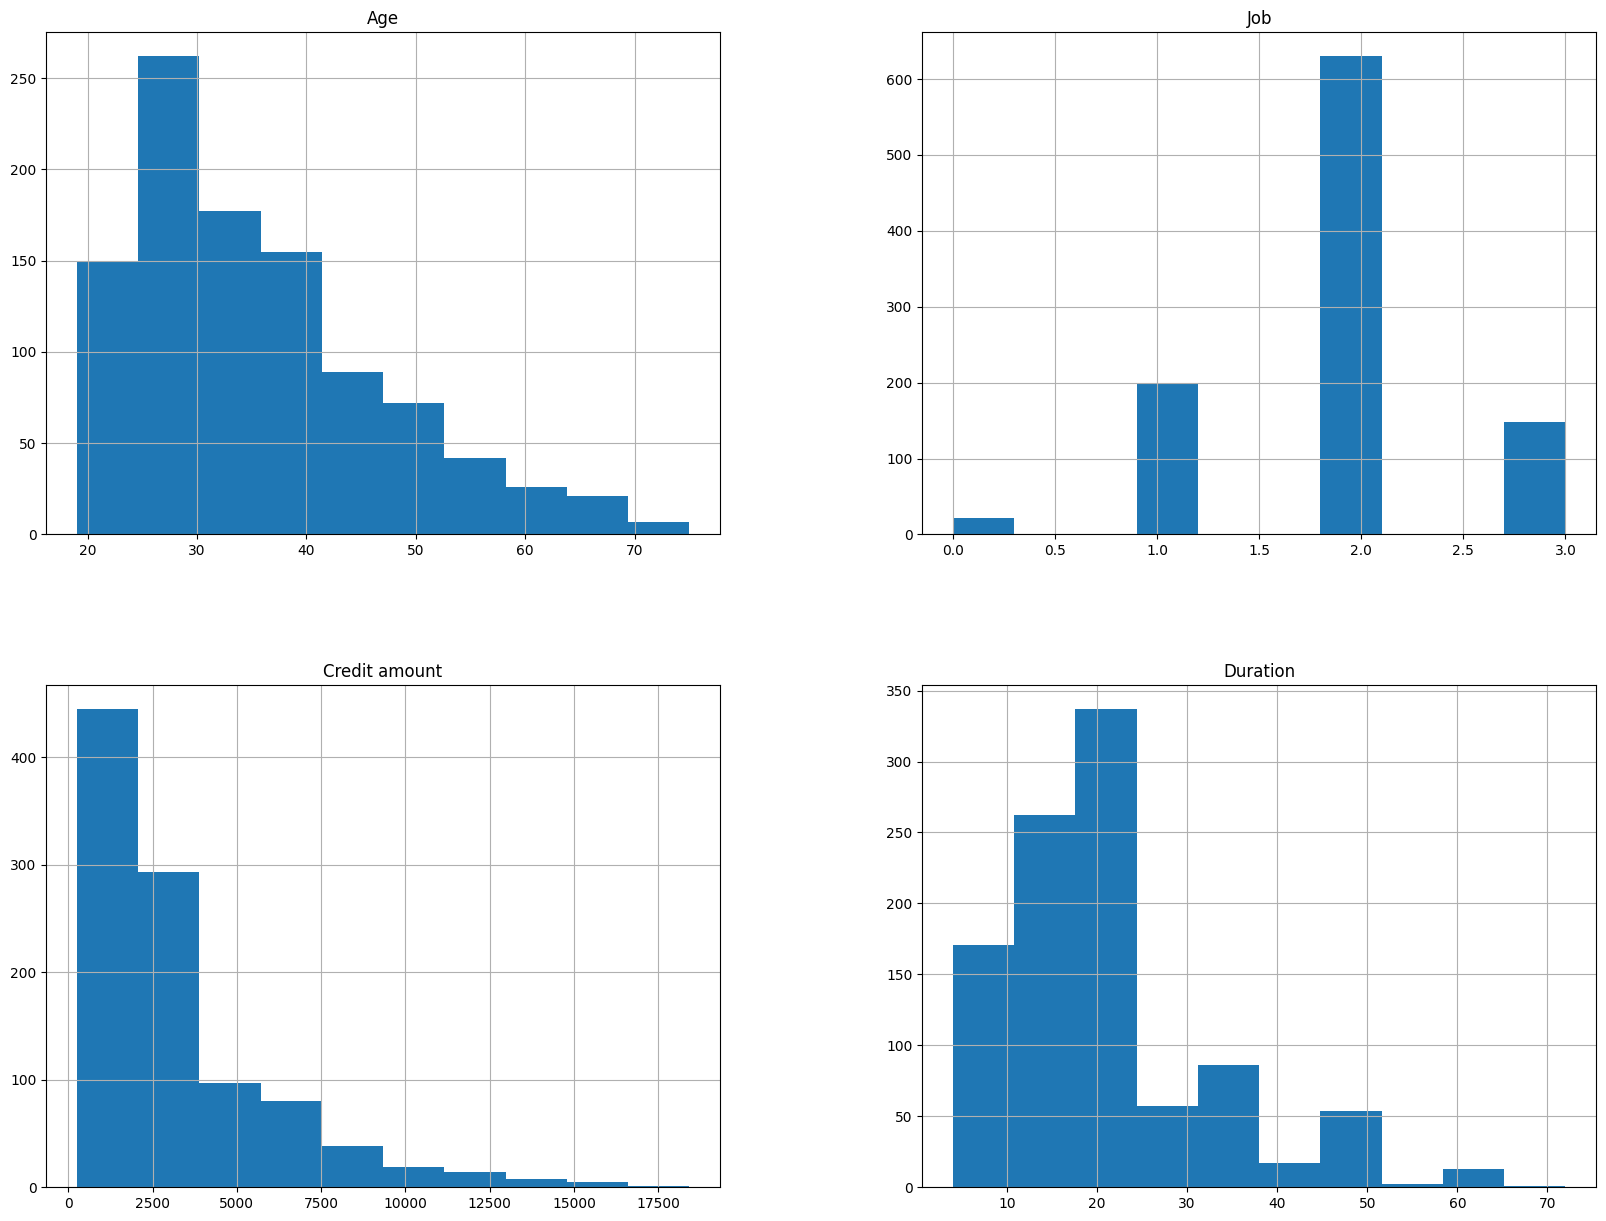

In [99]:
df.hist(figsize = (20,15));

Pada visualisasi pertama ini membuat visualisasi grafik pada data numerik yaitu kolom age, job, credit amount dan duration. Dan didapatkan :

Pada grafik age/umur terjadi pelonjakan kenaikan dari umur 20 ke 25 dan dari 25 sampai 40 merupakan umur yang dengan jumlah terbanyak dan semakin tua umurnya semakin menurun grafik <br>
Pada grafik job label 2 mendominasi dengan jumlah >600 <br>
Pada grafik Credit amount paling banyak yaitu pada jumlah credit amount 0-3000 dan untuk semakin besar credit amount semakin sedikit jumlahnya juga <br>
Pada grafik duration didapatkan durasi yang paling banyak diambil oleh nasabah yaitu dengan durasi 2-25 bulan, untuk yang lebih dari itu juga ada tetapi terdapat perbedaan grafik yang cukup berbeda signifikan lebih sedikit.

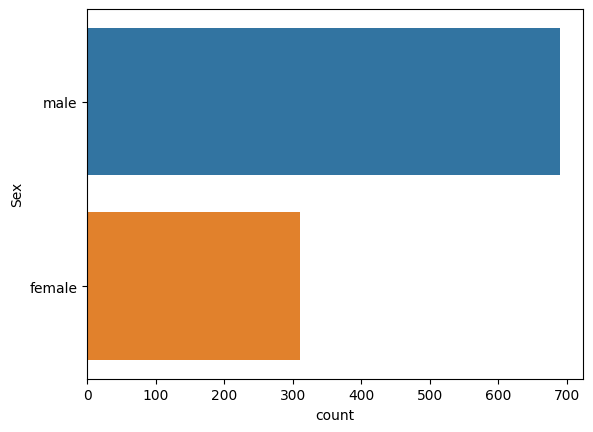

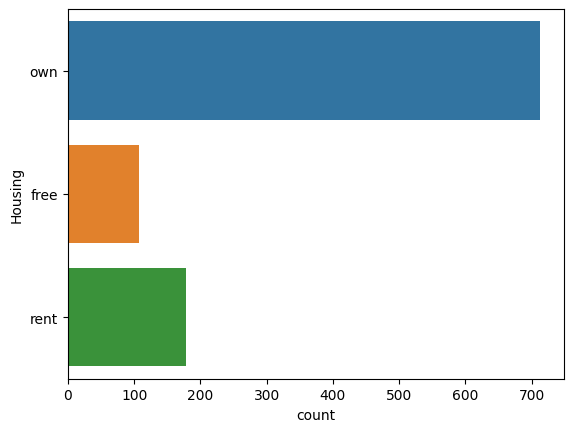

KeyboardInterrupt: ignored

In [100]:
for col in df[categorical].columns:
    sns.countplot(y =col, data = df)
    plt.show()

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,8));
sns.heatmap(corr, annot=True, fmt='.2f');

#Prepoccesing

In [ ]:
data = df.copy()

In [ ]:
encoder = LabelEncoder()
from sklearn.preprocessing import LabelEncoder
for label in categorical:
    data[label] = encoder.fit_transform(data[label])

In [ ]:
data[categorical]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)
data_scaled.head()

In [ ]:
X = data

#Modeling

In [ ]:
clusters=[]
for i in range(1,11):
  km =KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)),y=clusters, ax=ax)
ax.set_title('Mencari elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('inertia')


In [ ]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

#Visualisasi Hasil Algoritma

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X['Age'], X['Job'], X['Credit amount'], c=X['Labels'], cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Job')
ax.set_zlabel('Credit amount')

legend = ax.legend(*scatter.legend_elements(), title='Labels')
ax.add_artist(legend)

plt.show()


In [ ]:
print(X)

#Save Model

In [ ]:
X.to_excel("output_cluster.xlsx")